### Slade Brooks
##### brooksl@mail.uc.edu
##### 01.27.2023
# AeroComputing Assignment 2

i don't know linear algebra :(

This code (part 1/2) imports pyvot.py which contains all the functions necessary
to perform gauss pivot, LU pivot, and cramer method solution of [A]{x}={b}. Part 3 shows each method
solving the same matrix system. It times them and calculates the residual and displays the information
in a table. Part 4 computes each method again for 5 nonsingular equations of nxn 2, 4, 6, 8, and 12.
It computes the accuracy and time of each and then plots the compute time with respect to matrix
size for each method. Lastly, part 5 uses LUpivot to compute the inverse of a matrix. The dot product
of the original and the inverse is used to verify that it is the correct inverse.

In [220]:
# print what this code can do
print("This code (part 1/2) imports pyvot.py which contains all the functions necessary \
to perform gauss pivot, LU pivot, and cramer method solution of [A]{x}={b}. Part 3 shows each method\
solving the same matrix system. It times them and calculates the residual and displays the information\
in a table. Part 4 computes each method again for 5 nonsingular equations of nxn 2, 4, 6, 8, and 12.\
It computes the accuracy and time of each and then plots the compute time with respect to matrix\
size for each method. Lastly, part 5 uses LUpivot to compute the inverse of a matrix. The dot product\
of the original and the inverse is used to verify that it is the correct inverse.")

This code (part 1/2) imports pyvot.py which contains all the functions necessary to perform gauss pivot, LU pivot, and cramer method solution of [A]{x}={b}. Part 3 shows each methodsolving the same matrix system. It times them and calculates the residual and displays the informationin a table. Part 4 computes each method again for 5 nonsingular equations of nxn 2, 4, 6, 8, and 12.It computes the accuracy and time of each and then plots the compute time with respect to matrixsize for each method. Lastly, part 5 uses LUpivot to compute the inverse of a matrix. The dot productof the original and the inverse is used to verify that it is the correct inverse.


# Part 1 and 2

In [221]:
# import shtuff
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# pyvot is the module containing the text LU and gauss elim fxns, as well as my cramer rule
import pyvot

# Part 3

In [222]:
# define the inputs for a and b
a = np.array([[10., -2., -1., 2., 3., 1., -4., 7.],
            [5., 11., 3., 10., -3., 3., 3., -4.],
            [7., 12., 1., 5., 3., -12., 2., 3.],
            [8., 7., -2., 1., 3., 2., 2., 4.],
            [2., -15., -1., 1., 4., -1., 8., 3.],
            [4., 2., 9., 1., 12., -1., 4., 1.],
            [-1., 4., -7., -1., 1., 1., -1., -3.],
            [-1., 3., 4., 1., 3., -4., 7., 6.]], dtype="float64")
b = np.array([[0.],
            [-12.],
            [5.],
            [-3.],
            [25.],
            [26.],
            [-9.],
            [7.]], dtype="float64")

In [223]:
# solve all 3 methods and time them

# gauss pivot
t0 = time.perf_counter()
gauss = pyvot.gaussPivot(a.copy(), b.copy())
gausstime = time.perf_counter() - t0
# gauss residual
gaussres = np.average(np.dot(a.copy(), gauss) - b.copy())

# LU
t0 = time.perf_counter()
LUcomp = pyvot.LUdecomp(a.copy())
LUa, seq = LUcomp
LUsolve = pyvot.LUsolve(LUa.copy(), b.copy(), seq.copy())
LUtime = time.perf_counter() - t0
# LU residual
LUres = np.average(np.dot(a.copy(), LUsolve) - b.copy())

# cramer
t0 = time.perf_counter()
cramer = pyvot.cramer(a.copy(), b.copy())
cramertime = time.perf_counter() - t0
# cramer residual
cramres = np.average(np.dot(a.copy(), cramer) - b.copy())

# create dict of sols
sols = {"Method": ["Gauss Pivot", "LU Pivot", "Cramer"],
        "Solution": [gauss.round(3), LUsolve.round(3), cramer.round(3)],}

# create a pandas dataframe
df1 = pd.DataFrame(sols)

print(df1)

        Method                                           Solution
0  Gauss Pivot  [[1.0], [-1.0], [1.0], [-1.0], [1.0], [-1.0], ...
1     LU Pivot  [[1.0], [-1.0], [1.0], [-1.0], [1.0], [-1.0], ...
2       Cramer  [[1.0], [-1.0], [1.0], [-1.0], [1.0], [-1.0], ...


In [224]:
# create and print a table of the performance

# make a dictionary of the values
perf = {"Method": ["Gauss Pivot", "LU Pivot", "Cramer"],
        "Compute Time": [gausstime, LUtime, cramertime],
        "Residual": [gaussres, LUres, cramres]}

# create a pandas dataframe
df = pd.DataFrame(perf)

# output table
print(df)

        Method  Compute Time      Residual
0  Gauss Pivot      0.000429  6.661338e-16
1     LU Pivot      0.000624 -8.881784e-16
2       Cramer      0.000137  4.884981e-15


# Part 4

In [225]:
# define matrices for each size
Amatrices = [np.array([[-15.,  14.],[ -8.,  -5.]]),
np.array([[ 13.,  14.,   8.,  -5.],
       [ -3.,  -9.,  -4.,   7.],
       [-14., -12.,  -9.,  -2.],
       [ 12.,  14.,  -9.,   1.]]),
np.array([[  2.,   4., -10.,   9., -14., -14.],
       [ -7.,   9.,   4.,  -4.,   6.,  -4.],
       [-12.,   5.,  -7.,  14., -10.,  11.],
       [  7., -12.,   1.,  -1.,   4.,   0.],
       [  1.,   1., -10., -13.,  11.,  -3.],
       [  2.,   1.,  14.,  15.,  -1.,  -4.]]),
np.array([[-12.,  12.,  -6.,  14.,   0.,   5.,  15.,   3.],
       [  9., -12.,   8.,   9.,   3., -13.,   3.,  15.],
       [ -5.,   9.,   4.,   1.,   2.,  12.,   5.,  10.],
       [ 13., -10.,   7.,   2., -10.,  10.,  -7.,  -1.],
       [ -8., -13., -11., -12.,  -7.,  -7., -11.,   7.],
       [  2., -13.,   4.,   6., -10., -12.,   0.,  -3.],
       [  3.,  -8.,  14., -12.,  14.,  -2.,   4.,   4.],
       [  6.,   5.,   4., -10.,   5.,   0.,   0., -11.]]),
np.array([[  3.,  11.,  -9.,  -4., -13.,  -6., -14., -15.,   8.,   6.,  -1., -3.],
       [ -3.,   4.,   0.,  12.,  -2.,   9.,   8.,  12.,   4.,  -9.,   3., 0.],
       [ -8., -15.,  12.,   9.,  13., -12.,   7.,  11.,   5.,   7.,  -2., 8.],
       [-13.,   1.,  -5.,  -9.,   0.,   0.,   3.,  10.,   6.,  11.,  -7., 2.],
       [-12.,   4.,  -1.,  -1.,  11.,   3.,  -8., -10.,   0.,  -1.,  -2., 11.],
       [-14., -14.,   6.,   1.,  -6.,   9.,   2.,  -8.,   7., -11.,  13., -4.],
       [ -4.,   6.,  14.,  -9.,  12., -11.,   0.,   7.,   1.,   5.,  -5., 2.],
       [  0.,  -3.,  13.,   5.,   6., -12., -11.,  12., -13.,  -5.,   0., 6.],
       [ -8.,  14., -11., -13.,  14.,  10.,  -7.,   5.,  14.,  14.,  10., -4.],
       [  3.,   7.,  13.,  -9.,   7.,   8.,   6., -15., -14., -14.,   5., -2.],
       [ 14.,  15.,  -3.,  -2.,  13.,  14.,  10., -14., -10.,   2.,   6., 3.],
       [  5., -13.,   3.,  12.,  11.,   9.,  -7.,   0.,   1.,  14.,  11., 8.]])]
Bmatrices = [
np.array([[5.],
        [7.]]),
np.array([[-8.],
       [-8.],
       [-3.],
       [-1.]]),
np.array([[  6.],
       [ 14.],
       [-13.],
       [  2.],
       [ -1.],
       [  1.]]),
np.array([[ -5.],
       [  6.],
       [ 13.],
       [ -8.],
       [-13.],
       [ 13.],
       [-11.],
       [ -5.]]),
np.array([[  6.],
       [-15.],
       [-10.],
       [ 13.],
       [ -3.],
       [-14.],
       [  7.],
       [ -7.],
       [ -1.],
       [ -6.],
       [-12.],
       [-11.]])]

In [226]:
# create vars for plotting
# times
gausstimes = [0, 0, 0, 0, 0]
LUtimes = [0, 0, 0, 0, 0]
cramertimes = [0, 0, 0, 0, 0]
# residuals
gaussress = [0, 0, 0, 0, 0]
LUress = [0, 0, 0, 0, 0]
cramress = [0, 0, 0, 0, 0]

for i in range(5):
    # compute using each type of thingimajig

    # gauss
    t0 = time.perf_counter()
    gauss = pyvot.gaussPivot(Amatrices[i].copy(), Bmatrices[i].copy())
    gausstime = time.perf_counter() - t0
    # gauss residual
    gaussres = np.average(np.dot(Amatrices[i].copy(), gauss) - Bmatrices[i].copy())

    # LU
    t0 = time.perf_counter()
    LUcomp = pyvot.LUdecomp(Amatrices[i].copy())
    LUa, seq = LUcomp
    LUsolve = pyvot.LUsolve(LUa.copy(), Bmatrices[i].copy(), seq.copy())
    LUtime = time.perf_counter() - t0
    # LU residual
    LUres = np.average(np.dot(Amatrices[i].copy(), LUsolve) - Bmatrices[i].copy())

    # cramer
    t0 = time.perf_counter()
    cramer = pyvot.cramer(Amatrices[i].copy(), Bmatrices[i].copy())
    cramertime = time.perf_counter() - t0
    # cramer residual
    cramres = np.average(np.dot(Amatrices[i].copy(), cramer) - Bmatrices[i].copy())

    # set variables in lists
    gausstimes[i] = gausstime
    LUtimes[i] = LUtime
    cramertimes[i] = cramertime

    gaussress[i] = gaussres
    LUress[i] = LUres
    cramress[i] = cramres

In [227]:
# print table of accuracies for each matrix size
# make a dictionary of the values
acc = {"Matrix Size": ["2", "4", "6", "8", "12"],
        "Gauss Accuracy": [gaussress[0], gaussress[1], gaussress[2], gaussress[3], gaussress[4]],
        "LU Accuracy": [LUress[0], LUress[1], LUress[2], LUress[3], LUress[4]],
        "Cramer Accuracy": [cramress[0], cramress[1], cramress[2], cramress[3], cramress[4]]}

# create a pandas dataframe
df2 = pd.DataFrame(acc)

# output table
print(df2)

  Matrix Size  Gauss Accuracy   LU Accuracy  Cramer Accuracy
0           2    4.440892e-16  4.440892e-16    -3.996803e-15
1           4    1.776357e-15 -2.664535e-15    -6.439294e-15
2           6   -1.776357e-15 -1.776357e-15     1.480297e-16
3           8   -4.884981e-15 -4.440892e-15     2.842171e-14
4          12    9.621933e-16  2.220446e-15    -2.486900e-14


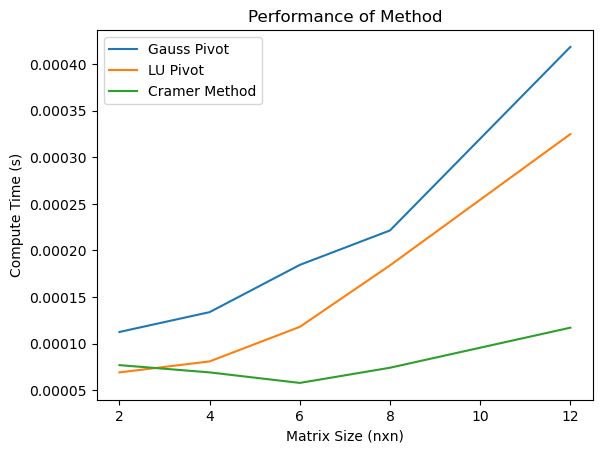

In [228]:
# plot time vs matrix size
matrix = [2, 4, 6, 8, 12]
plt.plot(matrix, gausstimes, label="Gauss Pivot")
plt.plot(matrix, LUtimes, label="LU Pivot")
plt.plot(matrix, cramertimes, label="Cramer Method")

# format plot
plt.title("Performance of Method")
plt.xlabel("Matrix Size (nxn)")
plt.ylabel("Compute Time (s)")
plt.legend(loc="upper left")

# show that boi
plt.show()

# Part 5

In [229]:
# invert a matrix using LU

# define matrix from book
A = np.array([[27.58, 7.004, -7.004, 0., 0.],
    [7.004, 29.57, -5.253, 0., -24.32],
    [-7.004, -5.253, 29.57, 0., 0.],
    [0., 0., 0., 27.58, -7.004],
    [0., -24.32, 0., -7.004, 29.57]]).astype("float64")

# set up length of loop and inverse matrix
n = len(A[0])
Ai = np.identity(n)

# do decomp on matrix
Ab, seq = pyvot.LUdecomp(A.copy())

# loop thru and calculate the inverse
for i in range(n):
    Ai[:,i] = pyvot.LUsolve(Ab, Ai[:,i], seq)

# print inverted matrix
print(Ai)

[[ 0.04670666 -0.03657862  0.00456496 -0.00812893 -0.03200971]
 [-0.03657862  0.16461698  0.02057952  0.03658314  0.14405524]
 [ 0.00456496  0.02057952  0.0385552   0.00457342  0.018009  ]
 [-0.00812893  0.03658314  0.00457342  0.04670867  0.04115148]
 [-0.03200971  0.14405524  0.018009    0.04115148  0.16204425]]


In [230]:

# verify matrix is inverse
print(np.dot(A, Ai))

[[ 1.00000000e+00  1.95160030e-17  1.95662404e-17  3.58349291e-17
  -4.04304686e-17]
 [ 1.20120010e-16  1.00000000e+00  1.04246566e-17 -2.05777391e-17
  -1.02305201e-15]
 [-3.33189666e-17  9.70608112e-17  1.00000000e+00  1.66001064e-17
   7.78033794e-17]
 [ 3.16952537e-17 -9.39680356e-17 -9.21932382e-18  1.00000000e+00
  -9.07061574e-17]
 [-7.50171992e-17  8.53071103e-16 -4.16496792e-17 -4.88112000e-17
   1.00000000e+00]]
